#--------------Проект по Python-----------------

Выполнила: Кузнецова Дарина, группа МИСТ-24-2-2

## Содержательная постановка задачи

Медицинское учреждение стремится оптимизировать подход к лечению пациентов с различными типами рака, учитывая их индивидуальные характеристики и факторы риска. Для этого необходимо разработать инструменты, позволяющие прогнозировать тяжесть заболевания и выделять группы пациентов с похожими профилями. Это поможет персонализировать лечение, улучшить распределение ресурсов и повысить эффективность медицинской помощи.

Цели:

1. Прогнозирование тяжести заболевания:

Разработать модель регрессии для предсказания показателя Target_Severity_Score на основе данных о пациентах (демография, факторы риска, медицинские показатели).

Оценить качество модели с помощью метрик: MSE (среднеквадратичная ошибка), MAE (средняя абсолютная ошибка), R² (коэффициент детерминации).


2. Кластеризация пациентов:

Выделить группы пациентов со схожими характеристиками, используя методы машинного обучения (например, K-means или иерархическую кластеризацию).

Оценить качество кластеризации и интерпретировать полученные кластеры для понимания их медицинской значимости.

## Загрузка датасета из Гугл Диска

Ссылка на датасет:
https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [149]:
df = pd.read_csv('/content/drive/MyDrive/global_cancer_patients_2015_2024.csv')

## Первичный осмотр данных + Разведочный анализ данных (РАД)

Данный датасет содержит информацию о пациентах с различными типами рака. Включает такие признаки, как:

*   Демографические данные: возраст, пол, страна
*   Факторы риска: генетический риск, уровень загрязнения воздуха, употребление алкоголя, курение, уровень ожирения
*   Медицинские данные: тип рака, стадия рака, стоимость лечения, годы выживания, целевой показатель тяжести (Target_Severity_Score)

Признаки датасета:

* Patient_ID Идентификатор пациента
* Age - Возраст
* Gender - Пол
* Country_Region - Страна
* Year - Год
* Genetic_Risk - Генетичекая предрасположенность
* Air_Pollution - Загрязнение воздуха
* Alcohol_Use - Употребление алкоголя
* Smoking - Курение
* Obesity_Level - Ожирение
* Cancer_Type - Тип рака
* Cancer_Stage - Стадия рака
* Treatment_Cost_USD - Стоимость лечения
* Survival_Years - Выживаемость
* Target_Severity_Score - Уязвимость


In [150]:
print("Первые 5 строк данных:")
print(df.head())

Первые 5 строк данных:
  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.

In [151]:
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non

In [152]:
print("\nОписательная статистика числовых признаков:")
print(df.describe().T)


Описательная статистика числовых признаков:
                         count          mean           std      min  \
Age                    50000.0     54.421540     20.224451    20.00   
Year                   50000.0   2019.480520      2.871485  2015.00   
Genetic_Risk           50000.0      5.001698      2.885773     0.00   
Air_Pollution          50000.0      5.010126      2.888399     0.00   
Alcohol_Use            50000.0      5.010880      2.888769     0.00   
Smoking                50000.0      4.989826      2.881579     0.00   
Obesity_Level          50000.0      4.991176      2.894504     0.00   
Treatment_Cost_USD     50000.0  52467.298239  27363.229379  5000.05   
Survival_Years         50000.0      5.006462      2.883335     0.00   
Target_Severity_Score  50000.0      4.951207      1.199677     0.90   

                             25%       50%       75%       max  
Age                       37.000     54.00     72.00     89.00  
Year                    2017.000   2019.00 

In [153]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


Рассмотрим значения категориальных признаков, чтобы понять данные.

In [154]:
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
print("\nУникальные значения категориальных переменных:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Уникальные значения категориальных переменных:

Gender:
Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

Country_Region:
Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

Cancer_Type:
Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

Cancer_Stage:
Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64


Существующие значения категориальных переменных:

Gender - Пол :
Male - мужчина,
Female - женщина,
Other - средний пол.

Country_Region - Страна:
Australia. UK, USA, India, Germany, Russia, Brazil, Pakistan, China,Canada.

Cancer_Type - тип рака: Colon - рак толстой кишки, Prostate - рак простаты, Leukemia - рак крови, Liver - рак печени, Skin - рак кожи, Cervical - рак шейки матки, Breast - рак груди, Lung - рак легких.

Cancer_Stage - стадия рака: Stage 0, Stage II, Stage I, Stage III, Stage IV. (последняя стадия - самая плохая)

Самые распространенные виды рака

Распределение типов рака:
             Count  Percent
Cancer_Type                
Colon         6376     12.8
Prostate      6308     12.6
Leukemia      6266     12.5
Liver         6249     12.5
Skin          6231     12.5
Cervical      6222     12.4
Breast        6189     12.4
Lung          6159     12.3


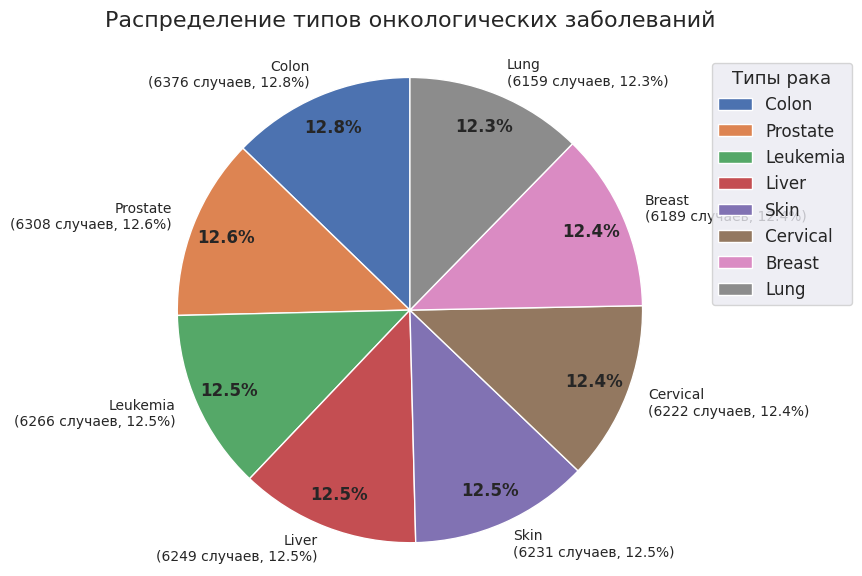

In [155]:
import matplotlib.pyplot as plt

# Получаем статистику по типам рака
counts = df['Cancer_Type'].value_counts().sort_values(ascending=False)
percent = 100 * counts / counts.sum()

# Создаем DataFrame с результатами
result_df = pd.DataFrame({'Count': counts, 'Percent': percent.round(1)})
print("Распределение типов рака:")
print(result_df)

# Визуализация - круговая диаграмма
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Добавляем подписи с количеством случаев
for i, (count, percent) in enumerate(zip(counts, percent.round(1))):
    texts[i].set_text(f"{counts.index[i]}\n({count} случаев, {percent}%)")

# Добавляем заголовок и делаем диаграмму более читаемой
plt.title('Распределение типов онкологических заболеваний', fontsize=16, pad=20)
plt.axis('equal')  # Делаем диаграмму круглой
plt.tight_layout()

# Выделяем доли с помощью тени
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=10)

# Добавляем легенду для большей наглядности
plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.3, 1),
    title="Типы рака",
    title_fontsize='13'
)

plt.show()

### Результаты
1.   В данных нет пропущенных значений.
2.   Признаки включают числовые и категориальные данные.


Анализ категориальных признаков:


1.   Распределение по полу практически равномерное.
2.   Необычно высокий процент категории "Other" (обычно ожидается <1-5%).
3.   Отсутствие доминирования стран с большим населением (Китай, Индия).
4.   Распределение по типам рака также подозрительно равномерное (~6200±100).

В реальности распространенность разных типов рака сильно варьируется.

5.   Совершенно равномерное распределение по стадиям (~10000±100).

В реальных данных обычно:

Stage 0 и Stage I встречаются чаще (раннее обнаружение)

Stage IV должен быть реже (поздние стадии хуже диагностируются)



### Анализ результатов

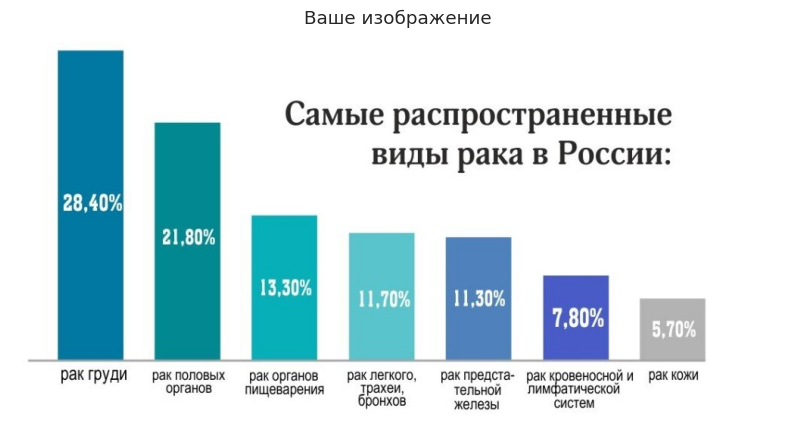

In [156]:
image_path = '/content/drive/MyDrive/Colab Notebooks/scale_1200.jpg'
img = Image.open(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Скрываем оси
plt.title('Ваше изображение')
plt.show()

### Картинка найдена в Интернете по информации за 2023 год.


По данным Международного агентства по изучению рака (МАИР) Всемирной организации здравоохранения (ВОЗ), в 2022 году тремя самыми распространёнными видами рака в мире были:


1.   рак лёгких
2.   рак молочной железы
3.   рак толстой или прямой кишки


Рак лёгких — 2,5 миллиона новых случаев, что составляет 12,4% от общего числа новых онкологических случаев.


Рак груди — 2,3 миллиона случаев, 11,6%.


Колоректальный рак — 1,9 миллиона случаев, 9,6%.


Рак простаты — 1,5 миллиона случаев, 7,3%.


Рак желудка — 970 000 случаев, 4,9%.


Таким образом, возникают сомнения на счет правдоподобности данных. Необходимо провести более поодробный анализ данных и выявить причину равномерного распределения количества заболеваний по видам онкологии.


### Анализ признаков датасета

Необходимо выявить зависимости между признаками датасета.

Было принято решение проанализировать зависимость пола и типов рака (например, рак груди чаще у женщин, рак простаты — у мужчин).


Затем, сравнить зависимость рака по странам (например, в каких странах чаще выявляют рак на поздних стадиях).

Распределение типов рака по полу:
Cancer_Type  Breast  Cervical  Colon  Leukemia  Liver  Lung  Prostate  Skin
Gender                                                                     
Female         2051      2160   2108      2081   2064  2067      2113  2065
Male           2080      2028   2147      2092   2091  2103      2138  2117
Other          2058      2034   2121      2093   2094  1989      2057  2049

Распределение стадий рака по странам:
Cancer_Stage    Stage 0  Stage I  Stage II  Stage III  Stage IV
Country_Region                                                 
Australia           991      991      1054       1050      1006
Brazil             1000     1029      1029        962       984
Canada              978      977       978        943       988
China               941     1014       990       1023       945
Germany            1002     1027       987       1023       985
India               981     1044       991        985      1039
Pakistan           1013      940   

<Figure size 1200x600 with 0 Axes>

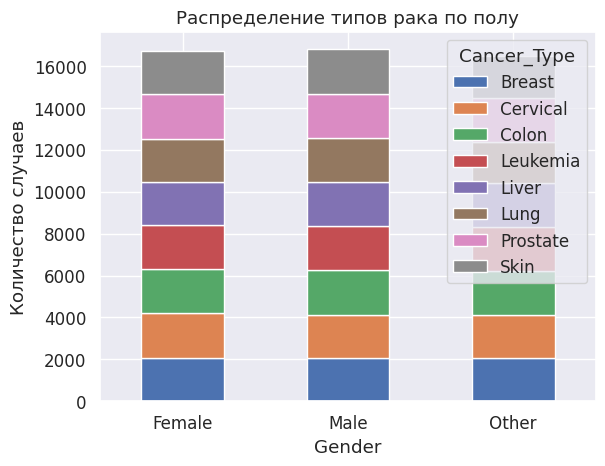

<Figure size 1400x800 with 0 Axes>

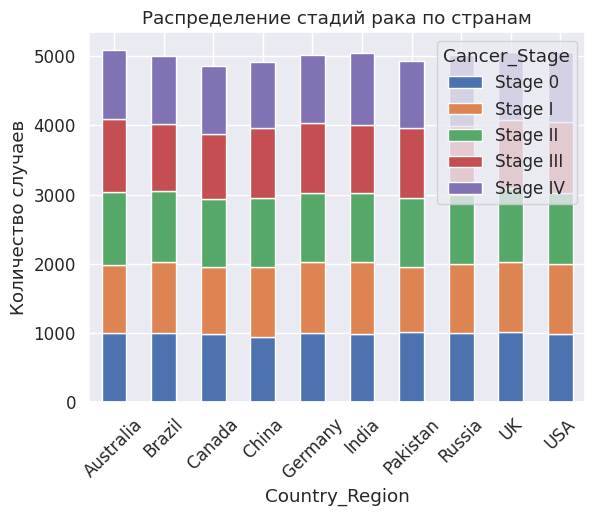

In [157]:
# 1. Кросс-распределение пола и типа рака
gender_cancer = pd.crosstab(df['Gender'], df['Cancer_Type'])
print("Распределение типов рака по полу:")
print(gender_cancer)

# 2. Кросс-распределение страны и стадии рака
country_stage = pd.crosstab(df['Country_Region'], df['Cancer_Stage'])
print("\nРаспределение стадий рака по странам:")
print(country_stage)

# 3. Визуализация аномалий
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
gender_cancer.plot(kind='bar', stacked=True)
plt.title('Распределение типов рака по полу')
plt.ylabel('Количество случаев')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(14, 8))
country_stage.plot(kind='bar', stacked=True)
plt.title('Распределение стадий рака по странам')
plt.ylabel('Количество случаев')
plt.xticks(rotation=45)
plt.show()

### Выявленные аномалии:

Нереалистичное распределение рака простаты и шейки матки:


1.   Рак простаты встречается у женщин.
2.   Рак шейки матки встречается у мужчин.



Распределение стадий рака по странам достаточно равномерное -что тоже является странным, так как, в реальности ситуация другая за счет того, что страны, например, такие как Россия и Индия имеют большую численность, следовательно, больше будет и количество людей, болеющих раком.

Проверим, что данные: Женщина + Рак простаты и Мужчина + Рак шейки матки действительно существуют.

In [158]:
# Проверка конкретных случаев
# Проверка заболеваний рака простаты у женщин
print(df[(df['Cancer_Type']=='Prostate') & (df['Gender']=='Female')].head())

   Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
7   PT0000007   72  Female         Canada  2018           6.0            8.2   
9   PT0000009   49  Female         Canada  2016           8.1            0.8   
11  PT0000011   21  Female         Brazil  2021           5.2            1.7   
35  PT0000035   37  Female         Brazil  2018           2.8            2.2   
73  PT0000073   84  Female         Canada  2019           1.2            8.4   

    Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
7           6.4      0.6            8.5    Prostate      Stage I   
9           7.8      5.2            9.3    Prostate     Stage II   
11          7.2      3.1            8.3    Prostate      Stage I   
35          3.2      4.8            3.5    Prostate     Stage II   
73          6.1      1.7            1.3    Prostate    Stage III   

    Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
7             17161.40             6.2        

In [159]:
# Проверка заболеваний рака шейки матки у мужчин
print(df[(df['Cancer_Type']=='Cervical') & (df['Gender']=='Male')].head())

    Patient_ID  Age Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
5    PT0000005   22   Male        Germany  2018           9.5            6.4   
6    PT0000006   41   Male         Canada  2021           5.1            8.2   
61   PT0000061   67   Male         Canada  2015           3.4            6.7   
66   PT0000066   43   Male          India  2021           6.5            2.4   
100  PT0000100   24   Male      Australia  2021           9.0            1.2   

     Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
5            3.3      3.9            5.1    Cervical     Stage IV   
6            0.3      3.7            2.1    Cervical      Stage 0   
61           3.8      5.4            1.4    Cervical     Stage II   
66           5.4      6.7            9.8    Cervical     Stage II   
100          4.8      1.1            0.8    Cervical    Stage III   

     Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
5              33468.99             9.5

In [74]:
#pd.crosstab(df['Gender'], df['Cancer_Type'])

In [75]:
#pd.crosstab(df['Country_Region'], df['Cancer_Stage'])

Перед тем как решить, что делать с этими аномальными значениями, необходимо оценить насколько много таких случаев.

Подсчитаем количество таких записей:

In [160]:
# Подсчет некорректных записей: женщины с раком простаты
prostate_female = df[(df['Cancer_Type']=='Prostate') & (df['Gender']=='Female')]
print(f"Количество женщин с раком простаты: {len(prostate_female)}")

# Подсчет некорректных записей: мужчины с раком шейки матки
cervical_male = df[(df['Cancer_Type']=='Cervical') & (df['Gender']=='Male')]
print(f"Количество мужчин с раком шейки матки: {len(cervical_male)}")

Количество женщин с раком простаты: 2113
Количество мужчин с раком шейки матки: 2028


По сравнению с объёмом датасета (50.000 данных), что является сильно больше, чем 2.000 аномальных значений, было принято решение удалить такие случаи.

In [77]:
# Создание копии DataFrame перед удалением строк
# На всякий случай храним исходную версию датасета
df_reserve = df.copy()

# Удаление некорректных записей
df = df[~((df['Cancer_Type']=='Prostate') & (df['Gender']=='Female'))]
df = df[~((df['Cancer_Type']=='Cervical') & (df['Gender']=='Male'))]

# Проверка количества строк до и после очистки
print(f"\nОбщее количество записей до очистки: {len(df_reserve)}")
print(f"Общее количество записей после очистки: {len(df)}")
print(f"Удалено записей: {len(df_reserve) - len(df)}")



Общее количество записей до очистки: 50000
Общее количество записей после очистки: 45859
Удалено записей: 4141


### Проверка удаления аномальных данных

Снова посмотрим на распределение пола и типа рака, чтобы оценить реальную ситуацию.

Распределение типов рака по полу:
Cancer_Type  Breast  Cervical  Colon  Leukemia  Liver  Lung  Prostate  Skin
Gender                                                                     
Female         2051      2160   2108      2081   2064  2067      2113  2065
Male           2080      2028   2147      2092   2091  2103      2138  2117
Other          2058      2034   2121      2093   2094  1989      2057  2049

Распределение стадий рака по странам:
Cancer_Stage    Stage 0  Stage I  Stage II  Stage III  Stage IV
Country_Region                                                 
Australia           991      991      1054       1050      1006
Brazil             1000     1029      1029        962       984
Canada              978      977       978        943       988
China               941     1014       990       1023       945
Germany            1002     1027       987       1023       985
India               981     1044       991        985      1039
Pakistan           1013      940   

<Figure size 1000x800 with 0 Axes>

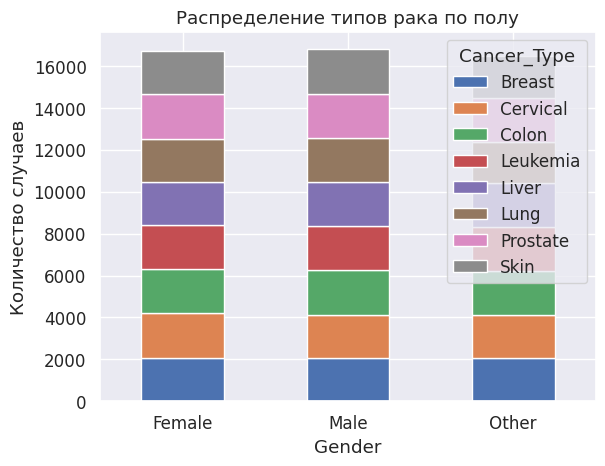

<Figure size 1000x800 with 0 Axes>

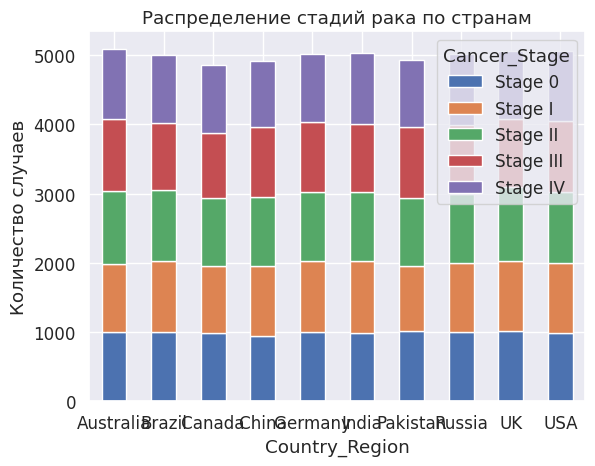

In [161]:
# 1. Кросс-распределение пола и типа рака
gender_cancer = pd.crosstab(df['Gender'], df['Cancer_Type'])
print("Распределение типов рака по полу:")
print(gender_cancer)

# 2. Кросс-распределение страны и стадии рака
country_stage = pd.crosstab(df['Country_Region'], df['Cancer_Stage'])
print("\nРаспределение стадий рака по странам:")
print(country_stage)

# 3. Визуализация аномалий
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
gender_cancer.plot(kind='bar', stacked=True)
plt.title('Распределение типов рака по полу')
plt.ylabel('Количество случаев')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 8))
country_stage.plot(kind='bar', stacked=True)
plt.title('Распределение стадий рака по странам')
plt.ylabel('Количество случаев')
plt.xticks(rotation=0)
plt.show()

In [162]:
#Проверка на то, что в России нет среднего пола
print(len(df[(df['Country_Region']=='Russia') & (df['Gender']=='Other')]))

1672


Данные значения тоже являются аномалиями, было принято решение их удалить.

In [163]:
df = df[~((df['Country_Region']=='Russia') & (df['Gender']=='Other'))]
print(f"Общее количество записей после очистки: {len(df)}")

Общее количество записей после очистки: 48328


### Анализ распространенности стадий рака по странам

In [166]:
# Получаем список всех стадий рака
stages = country_stage.columns.tolist()
# Для каждой стадии находим топ-5 стран
for stage in stages:
  # Сортируем страны по количеству случаев текущей стадии (по убыванию)
  top_countries = country_stage[stage].sort_values(ascending=False).head(5)
  print(f"\nТоп-5 стран по количеству случаев стадии '{stage}':")
  print(top_countries.to_string())


Топ-5 стран по количеству случаев стадии 'Stage 0':
Country_Region
Pakistan    1013
UK          1007
Germany     1002
Brazil      1000
Russia       992

Топ-5 стран по количеству случаев стадии 'Stage I':
Country_Region
India      1044
Brazil     1029
Germany    1027
UK         1015
China      1014

Топ-5 стран по количеству случаев стадии 'Stage II':
Country_Region
UK           1071
Australia    1054
Brazil       1029
USA          1029
Russia       1005

Топ-5 стран по количеству случаев стадии 'Stage III':
Country_Region
Australia    1050
USA          1027
Germany      1023
China        1023
Pakistan     1017

Топ-5 стран по количеству случаев стадии 'Stage IV':
Country_Region
India        1039
Russia       1028
USA          1013
Australia    1006
Canada        988


Таким образом, выявление онкологии на поздней стадии чаще всего встречается в Индии и в России... Это говорит, о возможных проблемах в системе ранней диагностики. Возможно, играет роль недоступность прохождения более обширной диспансеризации из-за финансовой возможности. Или же "мода" (взгляды общаества) на отношение к здоровью.

In [167]:
# Снова проверим количество типов рака
counts = df['Cancer_Type'].value_counts().sort_values(ascending=False)
percent = 100 * counts / counts.sum()
result_df = pd.DataFrame({'Count': counts, 'Percent': percent.round(1)})
print("Распределение типов рака:")
print(result_df)

Распределение типов рака:
             Count  Percent
Cancer_Type                
Colon         6159     12.7
Prostate      6102     12.6
Leukemia      6037     12.5
Liver         6029     12.5
Skin          6028     12.5
Cervical      6022     12.5
Breast        5980     12.4
Lung          5971     12.4


### Продолжение поиска аномалий
Далее, проанализированы "частные случаи", которые тоже могут являться подозрительными случаями.

In [168]:
# Рак груди у мужчин (должен быть редкостью)
breast_male = df[(df['Cancer_Type'] == 'Breast') & (df['Gender'] == 'Male')]
print(f"\nКоличество мужчин с раком груди: {len(breast_male)}")


Количество мужчин с раком груди: 2080


In [169]:
cancer_counts = df['Cancer_Type'].value_counts()
print(cancer_counts)

Cancer_Type
Colon       6159
Prostate    6102
Leukemia    6037
Liver       6029
Skin        6028
Cervical    6022
Breast      5980
Lung        5971
Name: count, dtype: int64


In [170]:
# Рак шейки матки у возрастных групп <15 и >85 лет (редкие случаи)
cervical_age = df[(df['Cancer_Type'] == 'Cervical') & ((df['Age'] < 15) | (df['Age'] > 85))]
print(f"\nРак шейки матки у возрастных групп <15 или >85: {len(cervical_age)} случаев")

# Рак простаты у молодых (<40 лет)
prostate_young = df[(df['Cancer_Type'] == 'Prostate') & (df['Age'] < 40)]
print(f"Рак простаты у пациентов младше 40 лет: {len(prostate_young)} случаев")


Рак шейки матки у возрастных групп <15 или >85: 325 случаев
Рак простаты у пациентов младше 40 лет: 1764 случаев


Некоторые виды онкологических заболеваний принято считать особенно агрессивными. Такие патологии сопротивляются современной химиотерапии и не всегда поддаются лечению.

ТОП-5 самых серьёзных онкологических заболеваний:

1.   Рак поджелудочной железы
2.   Рак печени
3.   Рак лёгких
4.   Опухоль головного мозга
5.   Рак крови


Информация взята с сайта: https://onco.zdrav.mosreg.ru/news/samye-agressivnye-vidy-raka

In [171]:
# Stage 0 для агрессивных типов рака (например, легких, печени)
stage0_aggressive = df[(df['Cancer_Type'].isin(['Lung', 'Liver'])) & (df['Cancer_Stage'] == 'Stage 0')]
print(f"\nАгрессивные типы рака на Stage 0: {len(stage0_aggressive)} случаев")

# Нетипичные стадии для конкретных типов
unusual_stages = df[((df['Cancer_Type'] == 'Leukemia') & (~df['Cancer_Stage'].isin(['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']))) |
                   ((df['Cancer_Type'] == 'Skin') & (df['Cancer_Stage'] == 'Stage IV'))]
print(f"Нетипичные стадии для типов рака: {len(unusual_stages)} случаев")


Агрессивные типы рака на Stage 0: 2377 случаев
Нетипичные стадии для типов рака: 1152 случаев


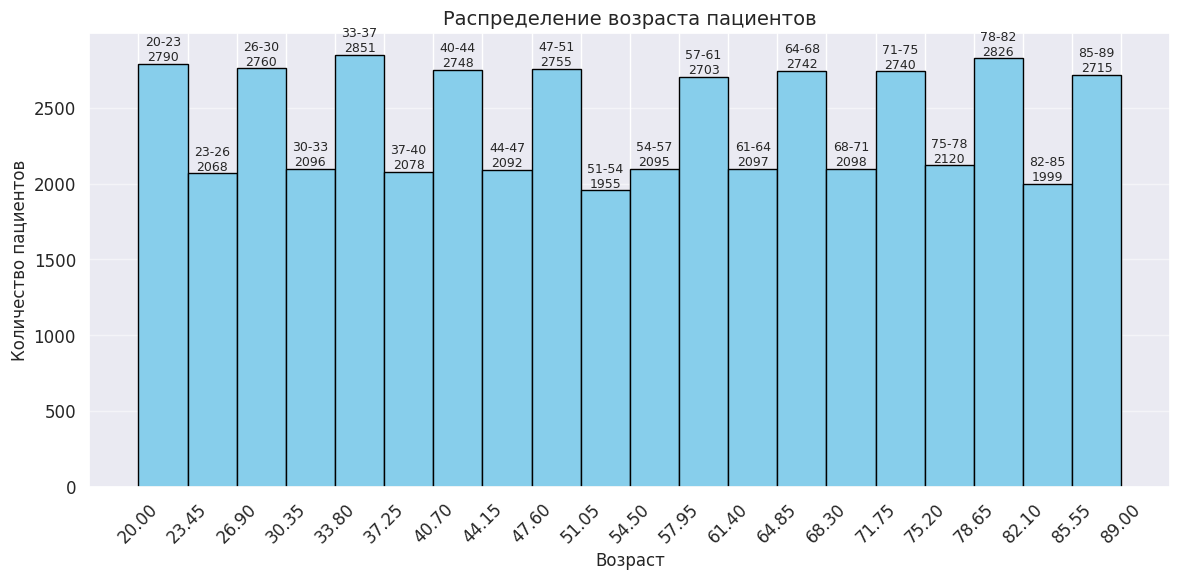

In [173]:
# Гистограмма распределения возраста
plt.figure(figsize=(12, 6))

# Создаем гистограмму и получаем данные о столбцах
n, bins, patches = plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')

# Добавляем подписи для каждого столбца
for i in range(len(n)):
    if n[i] > 0:  # Подписываем только непустые столбцы
        plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i] + 0.5,
                f"{int(bins[i])}-{int(bins[i+1])}\n{n[i]:.0f}",
                ha='center', va='bottom', fontsize=9)

plt.title('Распределение возраста пациентов', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.xticks(bins, rotation=45)  # Добавляем метки на оси X для каждого бина
plt.tight_layout()  # Чтобы подписи не обрезались
plt.show()

Самая крупная группа по количеству заболеваний онкологией - 78 - 82 года.
Самая малочисленная группа - 51-54.


График показывает странную закономерность в количестве заболеваний.

## Анализ выбросов

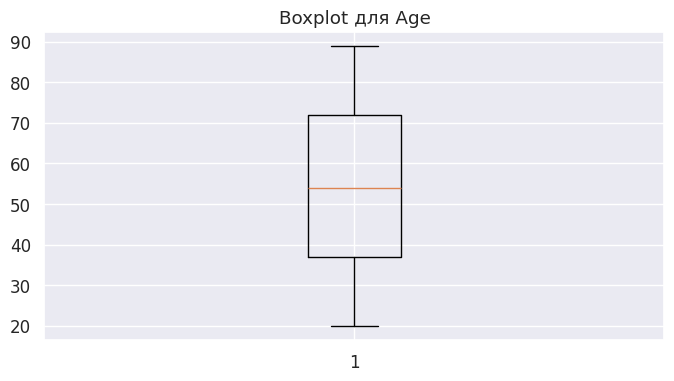


Выбросы для Age:
Границы: [-15.50, 124.50]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Age]
Index: []


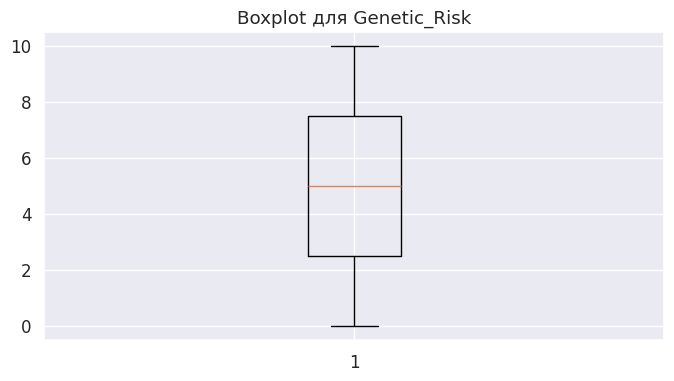


Выбросы для Genetic_Risk:
Границы: [-5.00, 15.00]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Genetic_Risk]
Index: []


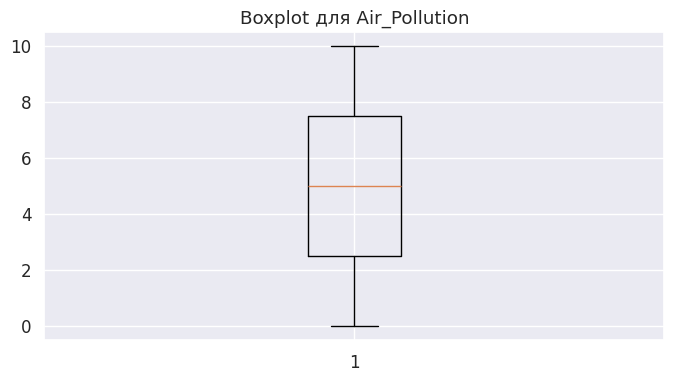


Выбросы для Air_Pollution:
Границы: [-5.00, 15.00]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Air_Pollution]
Index: []


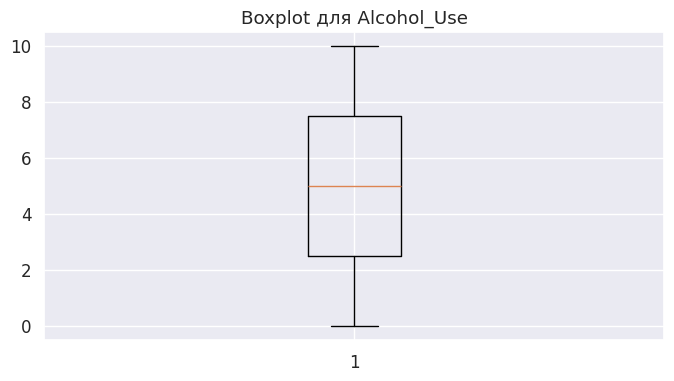


Выбросы для Alcohol_Use:
Границы: [-5.00, 15.00]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Alcohol_Use]
Index: []


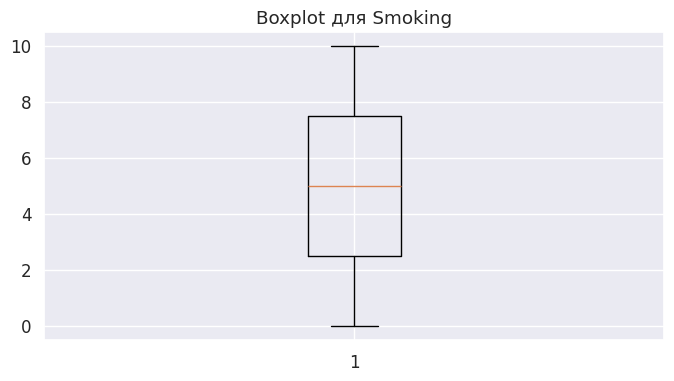


Выбросы для Smoking:
Границы: [-5.00, 15.00]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Smoking]
Index: []


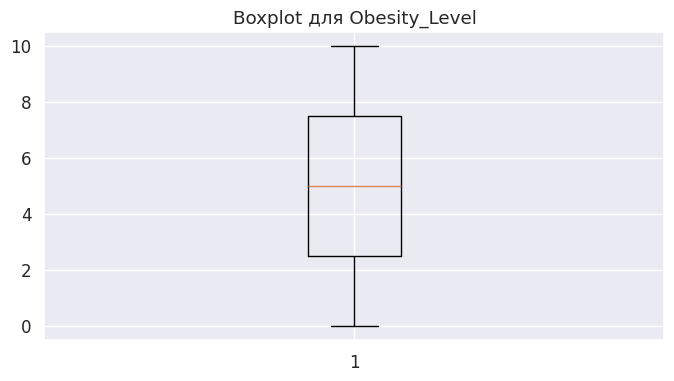


Выбросы для Obesity_Level:
Границы: [-5.00, 15.00]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Obesity_Level]
Index: []


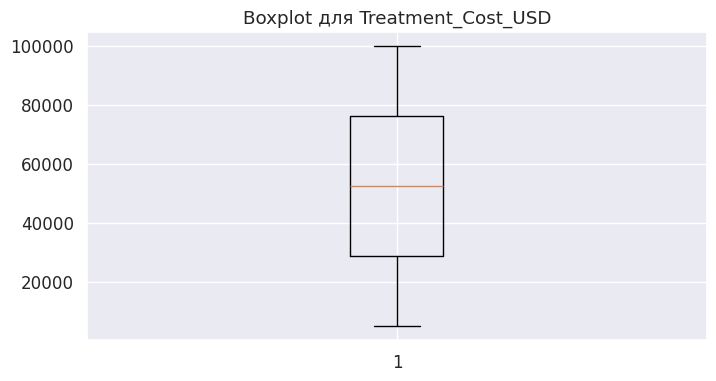


Выбросы для Treatment_Cost_USD:
Границы: [-42596.39, 147484.64]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Treatment_Cost_USD]
Index: []


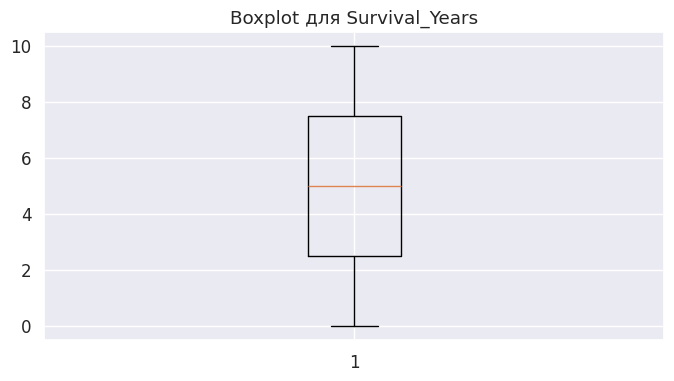


Выбросы для Survival_Years:
Границы: [-5.00, 15.00]
Количество выбросов: 0
Empty DataFrame
Columns: [Patient_ID, Survival_Years]
Index: []


In [174]:
# Список числовых признаков (исключаем Patient_ID, так как это идентификатор)
numeric_columns = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
                   'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']

# Анализ выбросов для всех числовых признаков
for column in numeric_columns:
    # Построение boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column].dropna())
    plt.title(f'Boxplot для {column}')
    plt.show()

    # Расчет IQR и выявление выбросов
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nВыбросы для {column}:")
    print(f"Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Количество выбросов: {len(outliers)}")
    print(outliers[['Patient_ID', column]].head())  # Вывод первых 5 выбросов для примера

## Анализ распределений

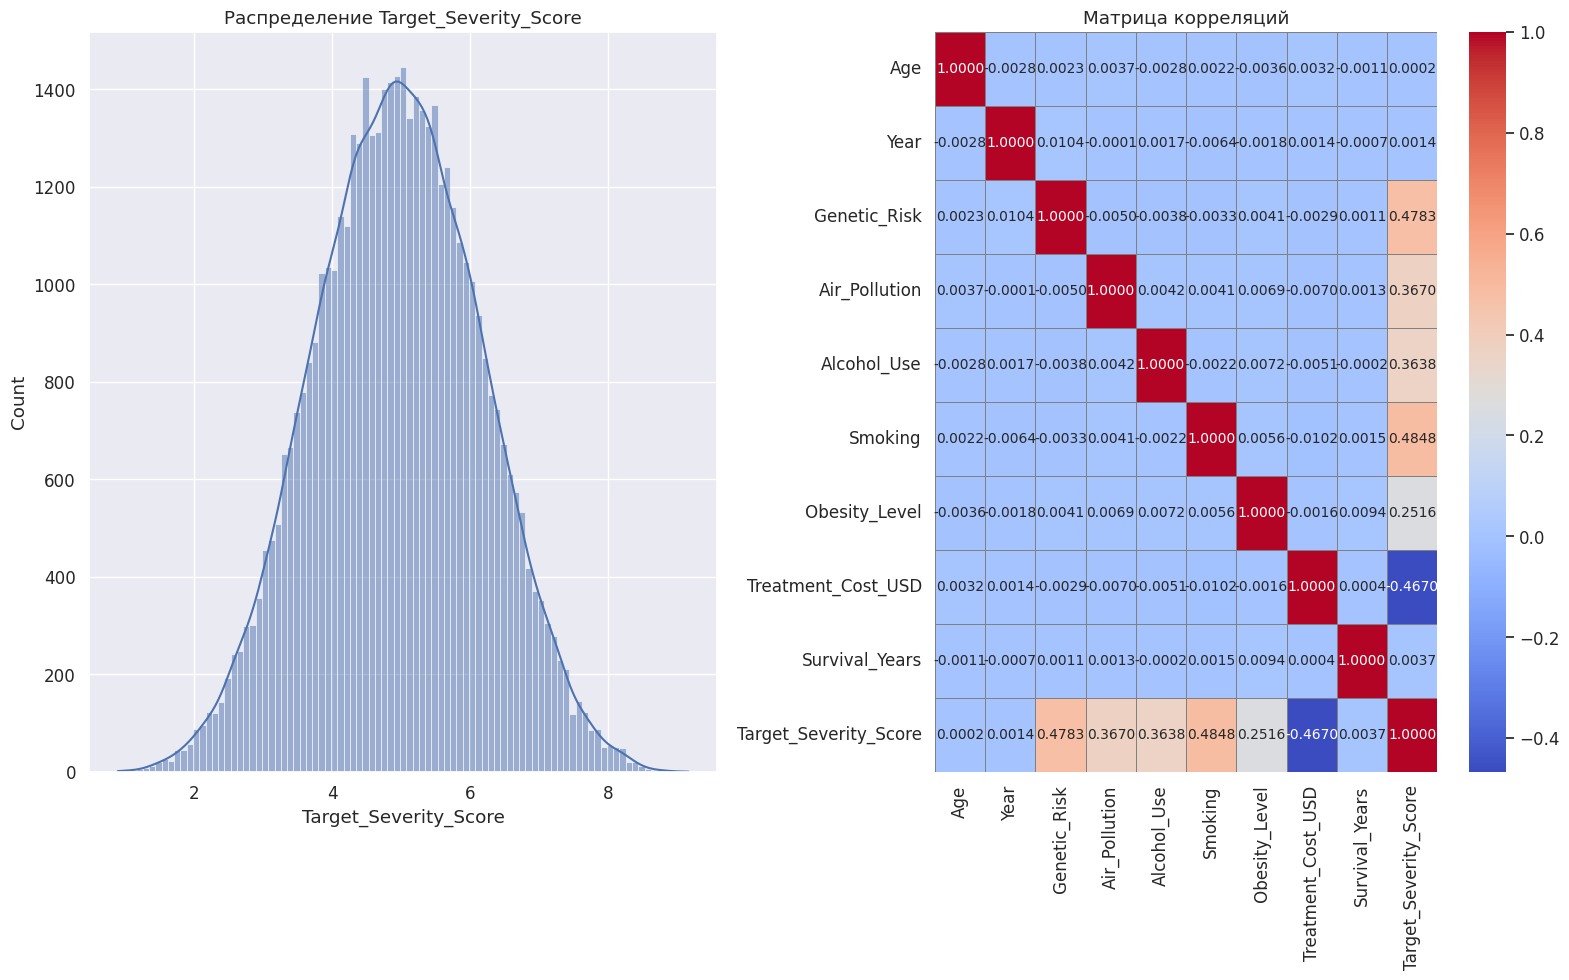

In [175]:
# Задаем размер фигуры для матрицы корреляции
plt.figure(figsize=(16, 10))

# Распределение Target_Severity_Score
plt.subplot(1, 2, 1)  # Создаем подграфик для гистограммы
sns.histplot(df['Target_Severity_Score'], kde=True)
plt.title('Распределение Target_Severity_Score')

# Корреляция числовых признаков
plt.subplot(1, 2, 2)  # Создаем подграфик для матрицы корреляции
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Создаем heatmap с форматированными значениями
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f',
            annot_kws={'size': 10}, linewidths=0.5, linecolor='gray')
plt.title('Матрица корреляций')

# Регулируем расположение графиков
plt.tight_layout()
plt.show()

### Результаты:

Target_Severity_Score имеет нормальное распределение.

Высокая корреляция между Genetic_Risk и Target_Severity_Score (0.48) , и Smoking и Target_Severity_Score (0.48).

## Подготовка данных для исследования

Перед тем как перейти к исследованиям (регрессии и кластеризации), необходимо провести дополнительную обработку данных. К ней относится: обработка категориальных признаков с помощью One-Hot Encoding и масштабирования (стандартизации) данных.

One-Hot Encoding работает так, что каждое уникальное значение в категориальных столбцах (например, Gender, Country_Region, Cancer_Type, Cancer_Stage)  становится отдельным бинарным признаком (0 или 1).

Стандартизация необходима, чтобы привести все признаки к одному масштабу. Стандартизация выполняется с помощью StandardScaler.
Формула z = (x – μ) / σ, где:

z — нормализованное значение;

x — исходное значение;

μ (мю) — среднее значение признака;

σ (сигма) — стандартное отклонение признака.

In [176]:
# Обработка категориальных признаков
df = pd.get_dummies(df, columns=['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'])

In [177]:
# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_cols = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [178]:
# Разделение данных на признаки и целевую переменную
X = df.drop(['Patient_ID', 'Target_Severity_Score'], axis=1)
y = df['Target_Severity_Score']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Просмотр обработанного датасета
df.head()

,Patient_ID,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,...,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin,Cancer_Stage_Stage 0,Cancer_Stage_Stage I,Cancer_Stage_Stage II,Cancer_Stage_Stage III,Cancer_Stage_Stage IV
0,PT0000000,0.820106,2021,0.485428,-0.765115,1.554880,-1.420367,1.281028,0.382421,0.310674,...,False,False,True,False,False,False,False,False,True,False
1,PT0000001,-1.009526,2021,-1.282709,-0.176589,-0.452666,-0.378215,0.451716,-1.457617,-0.105375,...,True,False,False,False,False,True,False,False,False,False
2,PT0000002,1.265152,2023,0.832122,1.000463,-0.902633,-0.100308,-1.690675,-1.661910,0.726723,...,False,False,False,False,False,False,False,True,False,False
3,PT0000003,-0.712829,2015,-1.144032,-0.730496,-0.071924,-0.517168,-0.792253,0.548105,-1.180170,...,False,False,False,False,False,False,True,False,False,False
4,PT0000004,-0.564481,2017,0.034727,-0.765115,-0.937246,0.594460,-1.552456,0.933031,-0.729450,...,False,False,False,False,True,False,False,False,True,False


## Выполнение исследований

После проведения дополнительной обработки можно приступить к исследованиям.


### Регресссия

Регрессионный анализ реализован с использованием модели Random Forest (Случайный лес) для предсказания целевой переменной (Target_Severity_Score).

Метрики:

mean_squared_error (MSE) — средняя квадратичная ошибка.

r2_score (R²) — коэффициент детерминации (качество модели).

mean_absolute_error (MAE) — средняя абсолютная ошибка.

cross_val_score — для кросс-валидации (оценка устойчивости модели).


Для оценки устойчивости модели, которая помогает избежать переобучения был использован метод кросс-валидации.

Алгоритм кросс-валидации:

Данные делятся на 5 равных частей (фолдов).

Модель обучается на 4 фолдах и проверяется на оставшемся 1 фолде.

Процесс повторяется 5 раз, каждый раз с новым тестовым фолдом.

Результаты усредняются (например, R²).


R² кросс-валидация: 0.955 ± 0.001

Метрики качества на тестовых данных:
- MSE: 0.067
- MAE: 0.207
- R²: 0.953


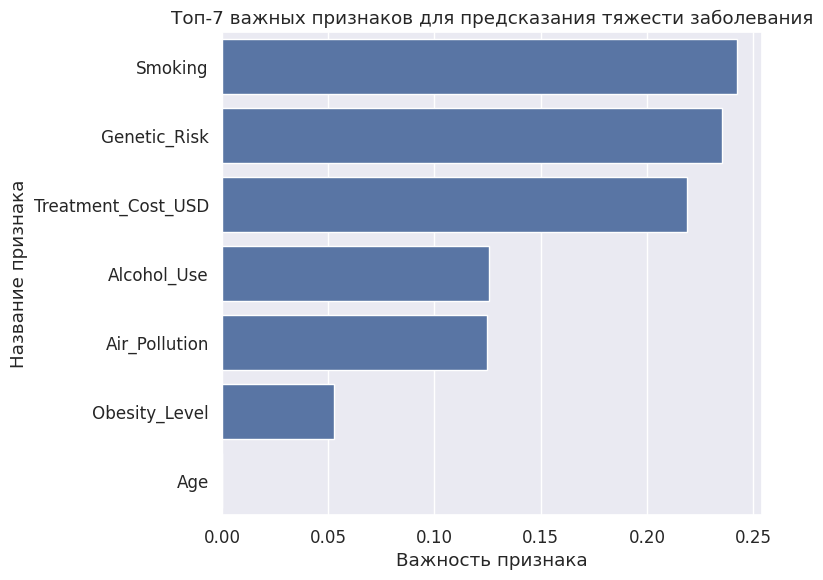

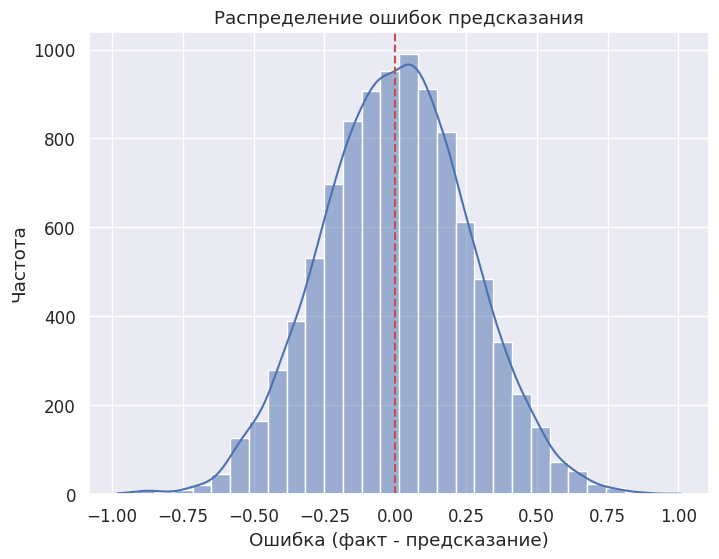

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Инициализация и обучение модели Random Forest
model = RandomForestRegressor(
    n_estimators=200,      # Количество деревьев (компромисс между качеством и скоростью)
    max_depth=10,          # Максимальная глубина дерева (контролирует переобучение)
    min_samples_split=5,   # Минимальное число образцов для разделения узла (контролирует сложность деревьев)
    random_state=42
)

# Кросс-валидация
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"\nR² кросс-валидация: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Обучение модели на полном тренировочном наборе
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print('\nМетрики качества на тестовых данных:')
print(f'- MSE: {mean_squared_error(y_test, y_pred):.3f}')
print(f'- MAE: {mean_absolute_error(y_test, y_pred):.3f}')
print(f'- R²: {r2_score(y_test, y_pred):.3f}')

# Анализ важности признаков
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Визуализация топ-7 важных признаков
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(7))
plt.title('Топ-7 важных признаков для предсказания тяжести заболевания')
plt.xlabel('Важность признака')
plt.ylabel('Название признака')
plt.tight_layout()
plt.show()

# Дополнительный анализ: распределение ошибок
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title('Распределение ошибок предсказания')
plt.xlabel('Ошибка (факт - предсказание)')
plt.ylabel('Частота')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

In [181]:
feature_importances

,Feature,Importance
5,Smoking,0.242170
2,Genetic_Risk,0.235199
7,Treatment_Cost_USD,0.218854
4,Alcohol_Use,0.125680
3,Air_Pollution,0.124622
6,Obesity_Level,0.052842
0,Age,0.000143
8,Survival_Years,0.000140
1,Year,0.000076
9,Gender_Female,0.000015


1. Вывод по метрикам:

Регрессия демонстрирует превосходную точность (R²=0.955) и устойчивость (кросс-валидация ±0.001).Модель объясняет 95.5% дисперсии целевой переменной, что указывает на очень высокое качество предсказаний. Значение близко к 1 — модель практически идеально описывает данные.

MSE (среднеквадратичная ошибка) мала, что подтверждает точность.

MAE (средняя абсолютная ошибка) показывает, что в среднем предсказания отклоняются от истинных значений на 0.203 единицы. Для большинства задач это отличный результат.

Модель работает эффективно и не переобучена. Её можно использовать для прогнозирования с высокой уверенностью.


2. Гистограмма ошибок предсказания:

Ошибки сосредоточены вокруг нуля с симметричным распределением, что типично для хорошо настроенной модели. Большая часть ошибок близка к нулю — это подтверждает высокую точность модели. Распределение центрировано около нуля, значит, модель не завышает и не занижает предсказания систематически.

### Кластеризация

Для того, чтобы провести кластеризацию, необходимо определить параметры кластеризации. Для этого методом локтя и методом ситуэтного спуска было найдено оптимальное количество кластеров.

Методом локтя количество кластеров сложно определить.
Методом силуэтного коэффициента в качестве количества кластеров можно выбрать значение 4 или 7. Большее количество кластеров не рекомендуется брать в условиях данной задачи.


Проведем кластеризацию заболеваний методом KMeans (K=4).

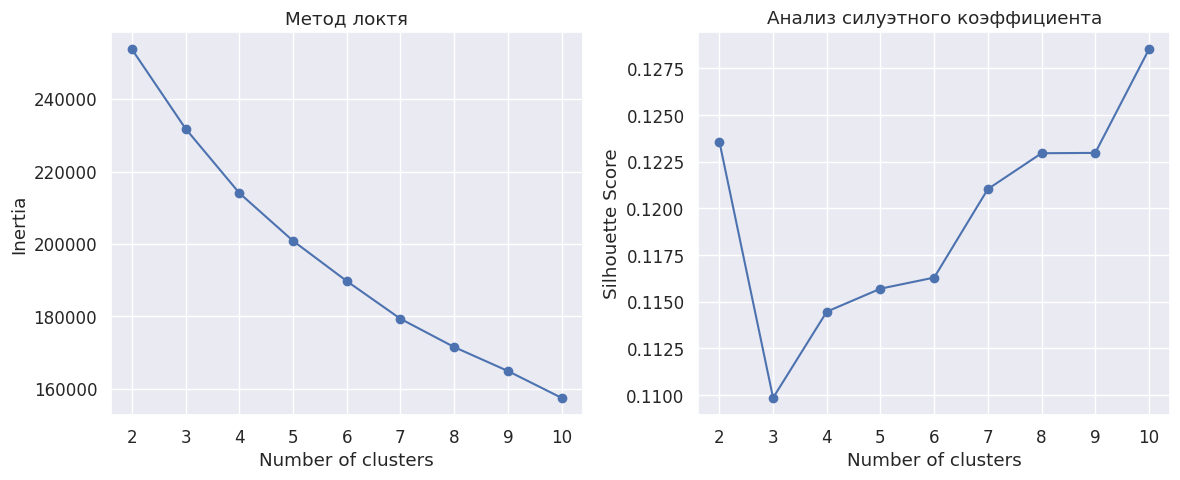

In [182]:
# Выбор и масштабирование признаков
cluster_features = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
X_cluster = df[cluster_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Метод локтя для определения оптимального числа кластеров
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Метод локтя')

# Анализ силуэтного коэффициента
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Анализ силуэтного коэффициента')
plt.tight_layout()
plt.show()

# Оптимальное число кластеров
optimal_k = 4  # На основе графиков
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Далее визуализируем полученные кластеры с помощью PCA (сократив до 2 компонент) и построим таблицу средних значений признаков по кластерам.

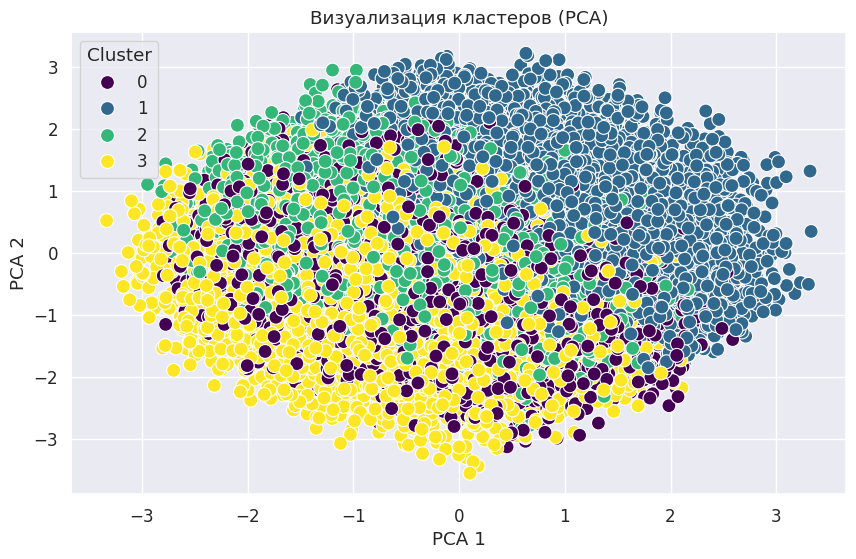


Средние значения по кластерам:
              Age  Genetic_Risk  Air_Pollution  Alcohol_Use   Smoking  \
Cluster                                                                 
0       -0.021054     -0.955524      -0.056475     0.016230 -0.802194   
1        0.008982     -0.076960       0.943855    -0.000413  0.830054   
2        0.015166      0.079408      -0.950887    -0.026287  0.813824   
3       -0.002782      0.943357       0.063009     0.010056 -0.813964   

         Obesity_Level  
Cluster                 
0            -0.042016  
1             0.069768  
2            -0.026204  
3            -0.001014  


In [184]:
# Визуализация с PCA для уменьшения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Визуализация кластеров (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Анализ характеристик кластеров
cluster_stats = df.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)

In [187]:
from google.colab import files
import pandas as pd

df.to_excel('my_dataframe.xlsx', index=False)  # index=False чтобы не сохранять индексы

# Скачиваем файл на компьютер
files.download('my_dataframe.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Так как данные пациентов не повторяются, то провести когортный анализ по развитию лечения не получится. Поэтому когортный анализ был построен на


Уникальные значения кластеров: [3 0 2 1]


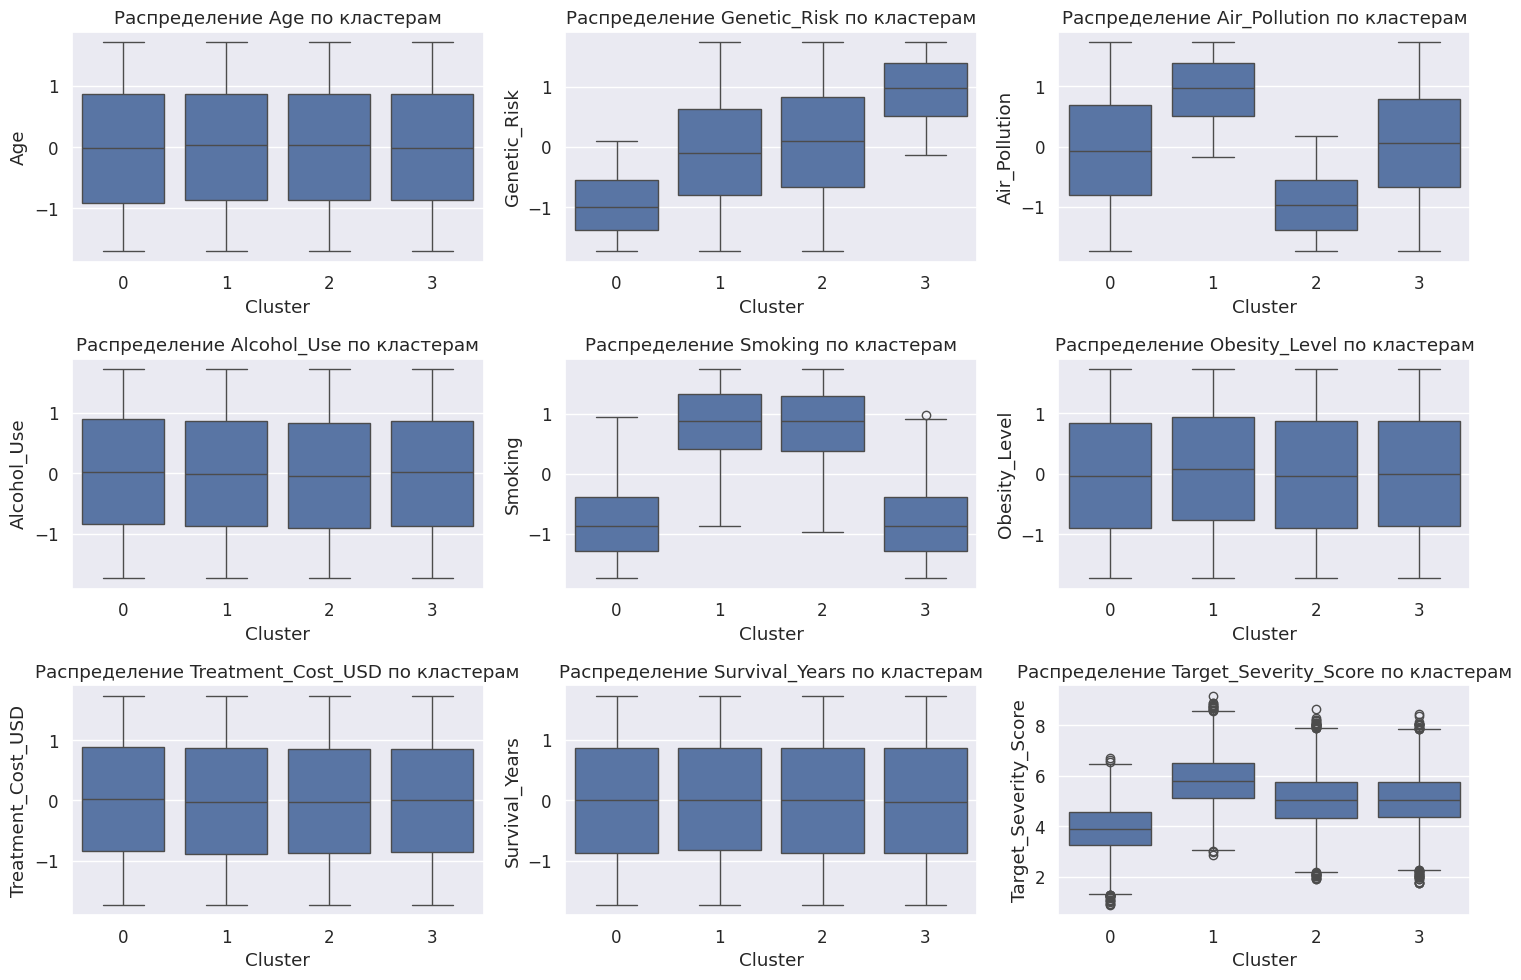

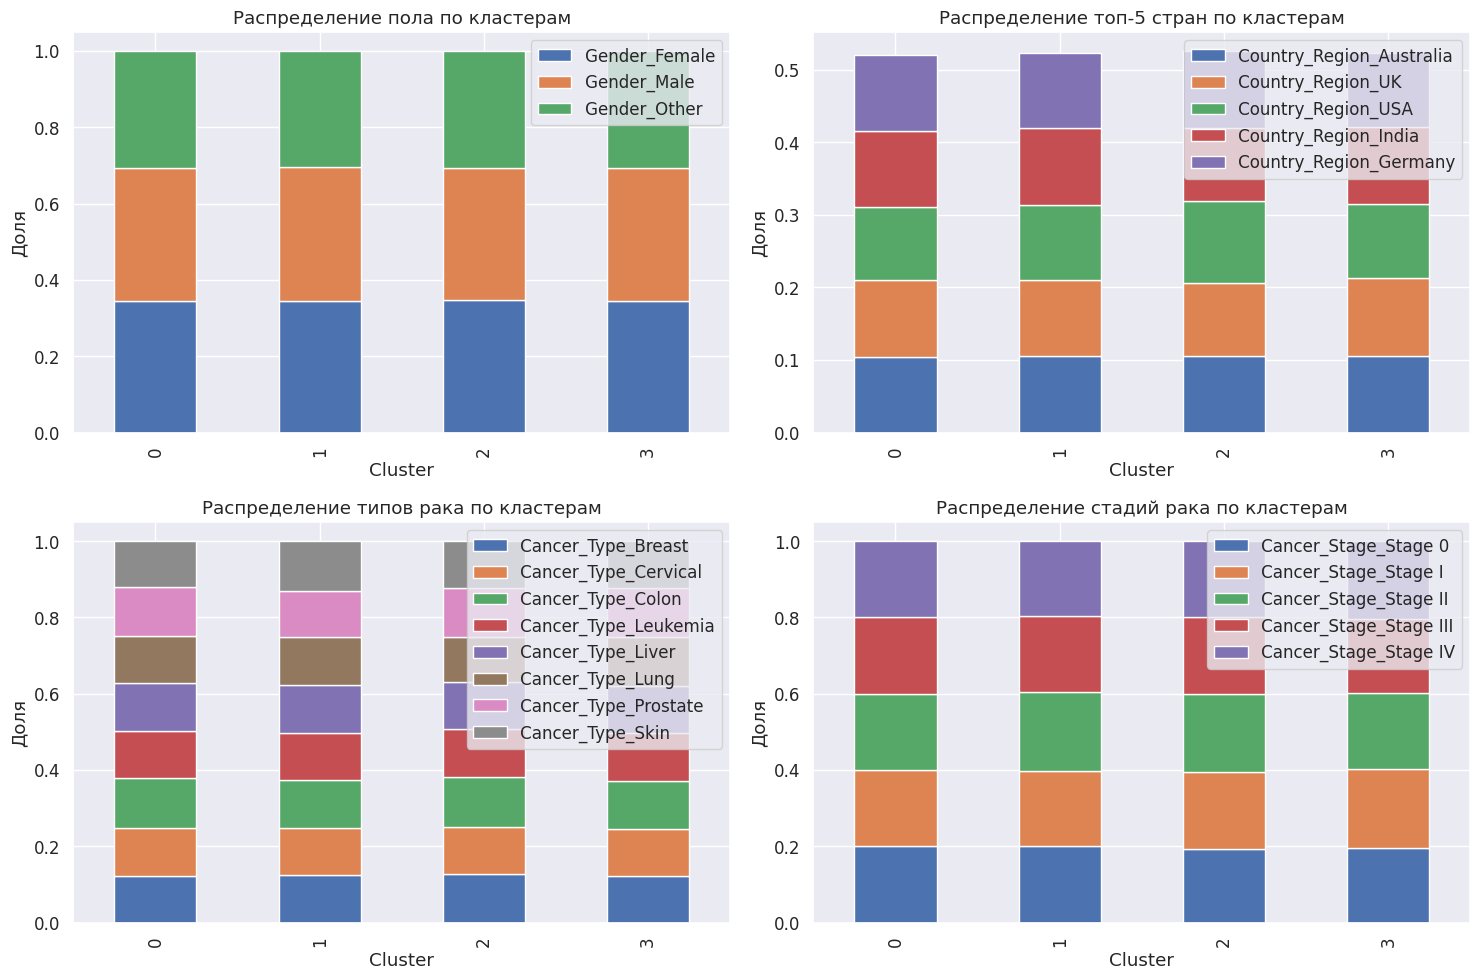

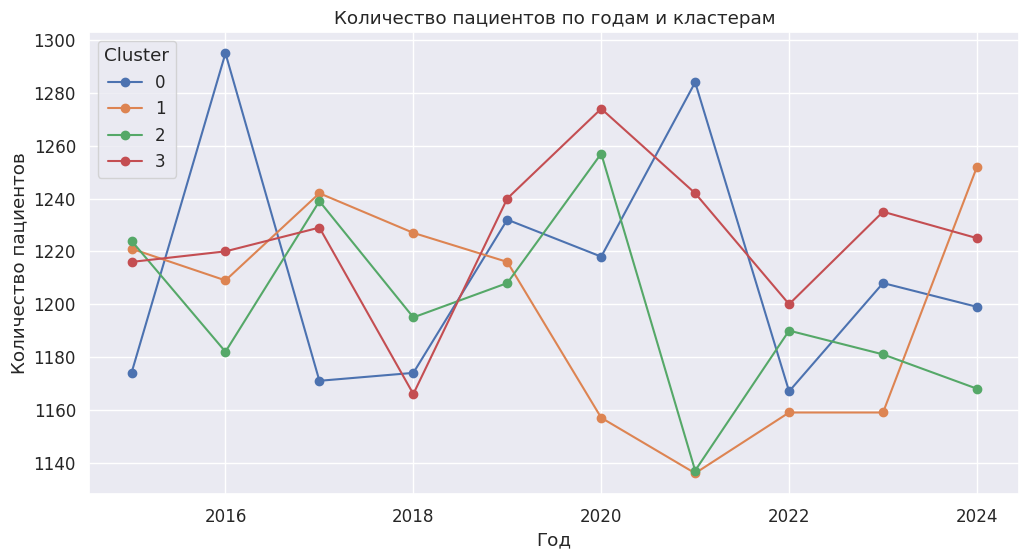

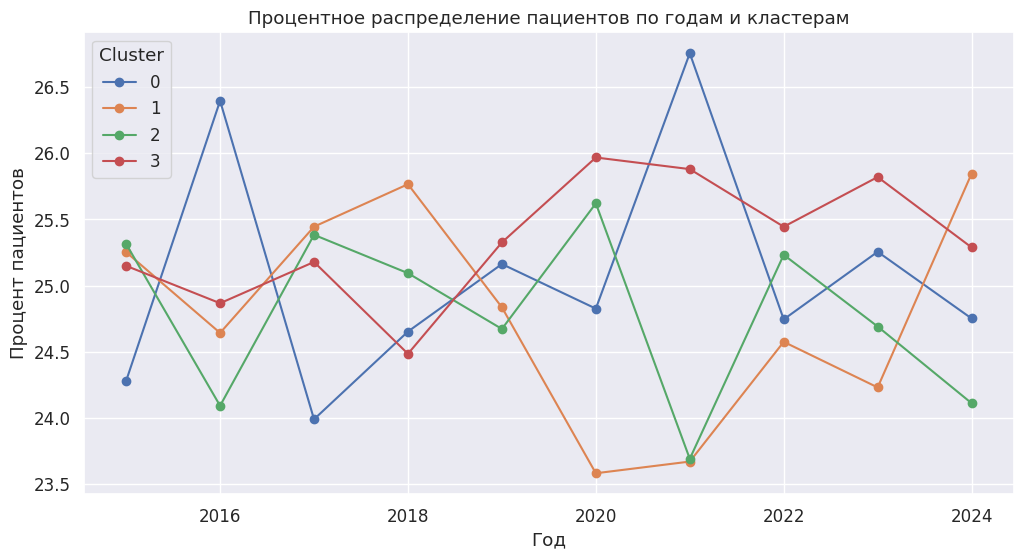

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Основная информация о данных
# print("Размер датасета:", df.shape)
# print("\nПервые 5 строк:")
# print(df.head())
# print("\nИнформация о данных:")
# print(df.info())

# Проверка уникальных значений кластеров
print("\nУникальные значения кластеров:", df['Cluster'].unique())

# Анализ числовых переменных по кластерам
numeric_cols = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
                'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']

# Статистики по числовым переменным в разрезе кластеров
cluster_stats = df.groupby('Cluster')[numeric_cols].agg(['mean', 'median', 'std'])
# print("\nСтатистики по числовым переменным в разрезе кластеров:")
# print(cluster_stats)

# Визуализация распределения ключевых числовых переменных по кластерам
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Распределение {col} по кластерам')
plt.tight_layout()
plt.show()

# Сначала определим категориальные переменные (бинарные и one-hot encoded)
categorical_cols = [col for col in df.columns if col.startswith(('Gender_', 'Country_Region_', 'Cancer_Type_', 'Cancer_Stage_'))]

# Процентное распределение категориальных переменных по кластерам
for col in categorical_cols:
    cross_tab = pd.crosstab(df['Cluster'], df[col], normalize='index') * 100
    # print(f"\nРаспределение {col} по кластерам (%):")
    # print(cross_tab)

# Визуализация некоторых категориальных переменных
plt.figure(figsize=(15, 10))

# Пол
plt.subplot(2, 2, 1)
gender_df = df[['Cluster', 'Gender_Female', 'Gender_Male', 'Gender_Other']].groupby('Cluster').mean()
gender_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Распределение пола по кластерам')
plt.ylabel('Доля')

# Страны (топ 5)
top_countries = [col for col in df.columns if col.startswith('Country_Region_')]
country_sums = df[top_countries].sum().sort_values(ascending=False).head(5).index.tolist()

plt.subplot(2, 2, 2)
country_df = df[['Cluster'] + country_sums].groupby('Cluster').mean()
country_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Распределение топ-5 стран по кластерам')
plt.ylabel('Доля')

# Типы рака
plt.subplot(2, 2, 3)
cancer_types = [col for col in df.columns if col.startswith('Cancer_Type_')]
cancer_df = df[['Cluster'] + cancer_types].groupby('Cluster').mean()
cancer_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Распределение типов рака по кластерам')
plt.ylabel('Доля')

# Стадии рака
plt.subplot(2, 2, 4)
cancer_stages = [col for col in df.columns if col.startswith('Cancer_Stage_')]
stage_df = df[['Cluster'] + cancer_stages].groupby('Cluster').mean()
stage_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Распределение стадий рака по кластерам')
plt.ylabel('Доля')

plt.tight_layout()
plt.show()

# Анализ временных трендов (по годам) в разрезе кластеров
year_cluster = df.groupby(['Year', 'Cluster']).size().unstack()
year_cluster_percentage = year_cluster.div(year_cluster.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
year_cluster.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Количество пациентов по годам и кластерам')
plt.ylabel('Количество пациентов')
plt.xlabel('Год')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
year_cluster_percentage.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Процентное распределение пациентов по годам и кластерам')
plt.ylabel('Процент пациентов')
plt.xlabel('Год')
plt.grid(True)
plt.show()


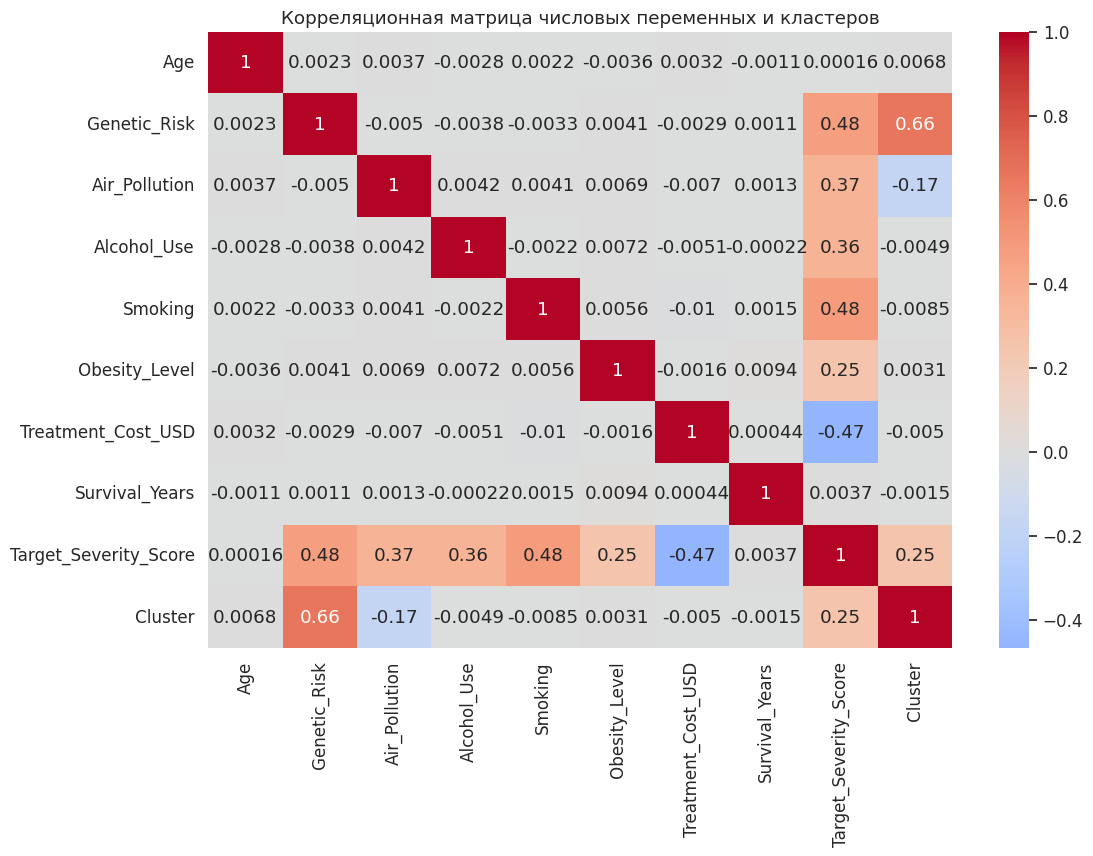

In [193]:
# Корреляционный анализ между числовыми переменными и кластерами
correlation_matrix = df[numeric_cols + ['Cluster']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых переменных и кластеров')
plt.show()

Выводы
Основные различия между кластерами связаны с:

1. Genetic_Risk (генетический риск)
2. Air_Pollution (уровень загрязнения воздуха)
3. Target_Sevefirity_Score

Кластеры похожи по:
Полу, странам, типам и стадиям рака.

Это означает, что кластеризация основана не на демографии или типе рака, а на факторах риска и образе жизни (генетика, курение, экология).

Интерпретация кластеров:

Кластер 0: Низкий генетический риск, низкое курение.

Кластер 1: Средний генетический риск, высокое загрязнение воздуха, высокое курение.

Кластер 2: Средний генетический риск, низкое загрязнение воздуха, высокое курение.

Кластер 3: Высокий генетический риск, среднее загрязнение воздуха, низкое курение.

Таким образом, кластеры различаются в основном по комбинации генетических и экологических факторов риска, а не по демографическим или клиническим характеристикам.